<h1 align="center"><b> Employee Attrition: Business Problem </b></h1><br>

## **1. Executive Summary**
Employee attrition is a major concern for organizations, impacting workforce stability, recruitment costs, and overall productivity. This study aims to analyze attrition patterns and identify key drivers of employee turnover using data-driven techniques. The insights generated will help HR professionals develop retention strategies to mitigate unnecessary employee loss.

### **2. Business Problem**
- High turnover rates increase recruitment and training costs, affecting operational efficiency
- Identifying critical factors contribution to attrition can guide proactive HR interventions
- Understanding attritions trends enable companies to enhance employee satisfaction and retention

### **Key Business Questions**
- What is the current attrition rate in the company?
- What demographic and financial factors influence employee turnover?
- Does job satisfaction and work life balance impact employee retention?
- How do tenure & career growth affect attrition rates?
- Is excessive workload or overtime a significant factor in attrition?
- What are the most important predictors of employee attrition?

In [67]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency, mannwhitneyu, shapiro
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [68]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [69]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [70]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## **3.Data Understanding**

### **Dataset Overview**
- Total records: 1470 employees
- Feaures: 35 variables covering demographics, compensation, job satisfaction, career progression, and work conditions
- Target variable: **Attrition (Yes/No)**

### **Data Cleaning & Preprocessing**
- No missing value in the dataset.
- Encoded categorical variables
- Performed 



In [71]:
# Checking for missing values
for i in df.columns:
    missing_values = df[i].isnull().sum()
    print(f'Missing values in column{i}: {missing_values}')

Missing values in columnAge: 0
Missing values in columnAttrition: 0
Missing values in columnBusinessTravel: 0
Missing values in columnDailyRate: 0
Missing values in columnDepartment: 0
Missing values in columnDistanceFromHome: 0
Missing values in columnEducation: 0
Missing values in columnEducationField: 0
Missing values in columnEmployeeCount: 0
Missing values in columnEmployeeNumber: 0
Missing values in columnEnvironmentSatisfaction: 0
Missing values in columnGender: 0
Missing values in columnHourlyRate: 0
Missing values in columnJobInvolvement: 0
Missing values in columnJobLevel: 0
Missing values in columnJobRole: 0
Missing values in columnJobSatisfaction: 0
Missing values in columnMaritalStatus: 0
Missing values in columnMonthlyIncome: 0
Missing values in columnMonthlyRate: 0
Missing values in columnNumCompaniesWorked: 0
Missing values in columnOver18: 0
Missing values in columnOverTime: 0
Missing values in columnPercentSalaryHike: 0
Missing values in columnPerformanceRating: 0
Mis

Since there are no missing values, we don't have to do anything to worry. Since this is an employee data, I think there is no need to check for duplicate values. Lets look at the column type next

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [73]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


## **4. Exploratory Data Analysis**
To uncover hidden patterns of Attrition, EDA is conducted to several key factors

### **4.1 Attrition Rate Analysis**

Before we start analyzing further, let's take a look at the dataset. Let's ask ***What is the current attrition rate of the company?*** Understanding the current rate will give a early assesment of the current condition

**Summary:**
Seems the dataset is quite imbalanced. Only around 16% of the employee left the company

C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\890176283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attrition'], palette='coolwarm')


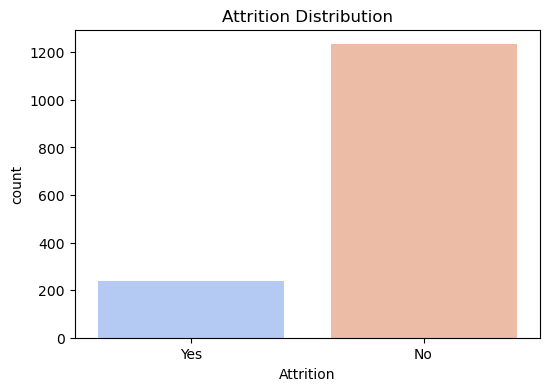

In [74]:
# Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Attrition'], palette='coolwarm')
plt.title("Attrition Distribution")
plt.show()

### **4.2. Demographic Influence**
To answer ***"Who's leaving?"***, we examined ***Age***, ***Gender***, and ***MaritalStatus***. 
**Key Findings**:
- Millenials (26 - 40 years old) are more likely to leave
- Single employees leave at a significantly higher rate than married/divorced employees
- Male employee are slightly to resign more than female employees


In [75]:
import scipy.stats as  stats
# Creating boxen plot function
def viz_boxen_plot(df, x, y):
    # Seperating attrition
    resigned = df.query(f"{y} == 'Yes'")[x]
    stayed = df.query(f"{y} == 'No'")[x]
    
    stat_resigned, p_resigned = stats.shapiro(resigned)
    stat_stayed, p_stayed = stats.shapiro(stayed)
    
    print(f'P-value resigned normality: {p_resigned: .5f}, Stayed: {p_stayed: .5f}')
    
    if p_resigned < 0.05 or p_stayed <0.05:
        print('Data not normally distributed, using Mann-Whitney U Test')
        stat, p = stats.mannwhitneyu(resigned, stayed, alternative='two-sided')
    else:
        print("Data normally distributed")
        stat, p = stats.ttest_ind(resigned, stayed)
        
    # Output of hypotesis testing
    print(f'Statistical test: {stat: .5f}, P-value: {p:.5f} ')
    
    # Result
    alpha = 0.05
    if p<alpha:
        test_result = print(f"Reject null hypotesis. There is a significant difference of {x} of people who stayed and resigned")
    else:
        test_result = print(f'Failed to reject null hypotesis. There is no significant difference of {x}')
    
    ax = sns.boxenplot(data = df, x = x, y = y, hue = y, alpha = 0.8)
    plt.suptitle(f'Distribution of {y} by {x}')
    plt.ylabel(f'{y}')
    plt.title(test_result, size = 9)
    plt.xlabel(f'{x}')
    plt.tight_layout()
    
    # Create text
    median_attrition_yes = df.query(f"{y} == 'Yes'")[x].median()
    median_attrition_no = df.query(f"{y} == 'No'")[x].median()
    mean_attrition_yes = df.query(f"{y} == 'Yes'")[x].mean()
    mean_attrition_no = df.query(f"{y} == 'No'")[x].mean()
    
    plt.text(max(df[x]),0, f'Avg: {round(mean_attrition_yes, 1)} \nMedian:{median_attrition_yes}',
             ha = 'left', va = 'center', rotation = 0, size= 9
             ,bbox = dict(boxstyle = "roundtooth, pad=0.5", fc = 'orange', ec = 'r', lw = 0))
    plt.text(max(df[x]),1, f'Avg: {round(mean_attrition_no, 1)} \nMedian:{median_attrition_no
             }',
             ha = 'left', va = 'center', rotation = 0, size= 9
             ,bbox = dict(boxstyle = "roundtooth, pad=0.5", fc = 'orange', ec = 'r', lw = 0))

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  106859.00000, P-value: 0.00000 
Reject null hypotesis. There is a significant difference of Age of people who stayed and resigned


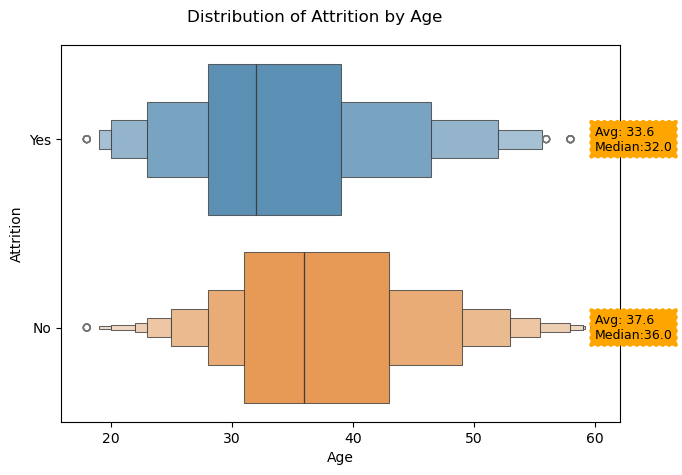

In [76]:
# Age analaysis
viz_boxen_plot(df, 'Age', 'Attrition')

In [77]:
def bar_chart_viz(df, x, ax = None):
    resigned = df.query('Attrition == "Yes"')
    plt.figure(figsize= (10,5))
    order = resigned[x].value_counts().index
    #Create plot and title
    ax = sns.countplot(
        data = resigned
        ,x = x
        ,order = order
        ,palette= 5*["#4978d0"] + 6*["#7886a0"]
    )
    ax.set_title(f'Number of Employee Resigned by {x}')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
    # Add percentage
    total = resigned.shape[0]
    for pct in ax.patches:
        ax.annotate(f'{round(pct.get_height()/resigned.shape[0]*100, 1)}%'
                    ,(pct.get_x() + pct.get_width() / 2, pct.get_height())
                    ,ha = 'center', va = 'bottom'
                    )

C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: UserWarning: The palette list has more values (11) than needed (4), which may not be intended.
  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)


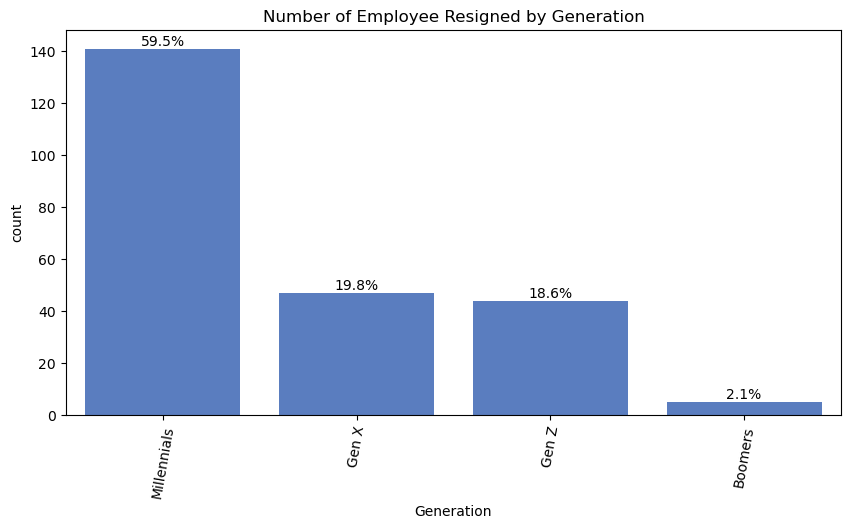

In [78]:
# Define function to classify generations
def classify_generation(age):
    if age <= 25:
        return "Gen Z"
    elif 26 <= age <= 40:
        return "Millennials"
    elif 41 <= age <= 56:
        return "Gen X"
    else:
        return "Boomers"

# Apply function to create the new column
df["Generation"] = df["Age"].apply(classify_generation)

bar_chart_viz(df, 'Generation')


It seems that millenials tend to leave the company more than other generation

C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)


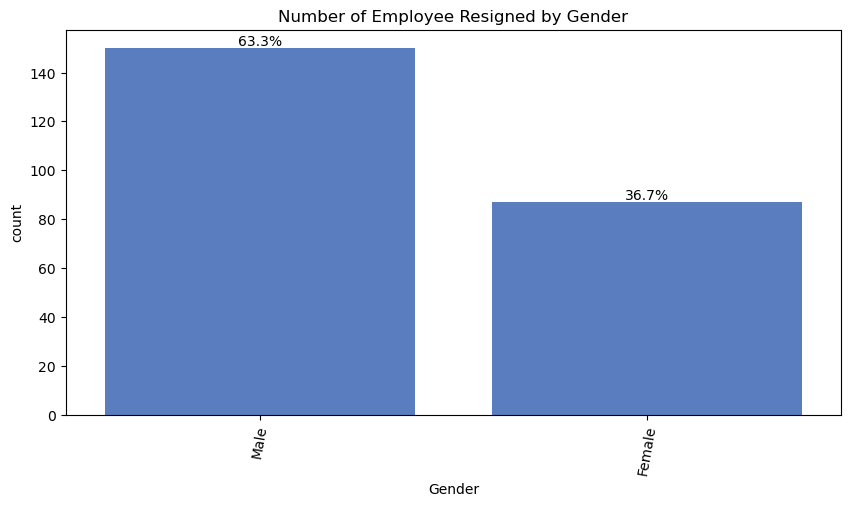

In [79]:
# Gender Dsitribution
bar_chart_viz(df, 'Gender')

Based on the observation, male tend to leave more often than the Female employee. Lets take a look at Marital Status

In [80]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Generation'],
      dtype='object')

C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)


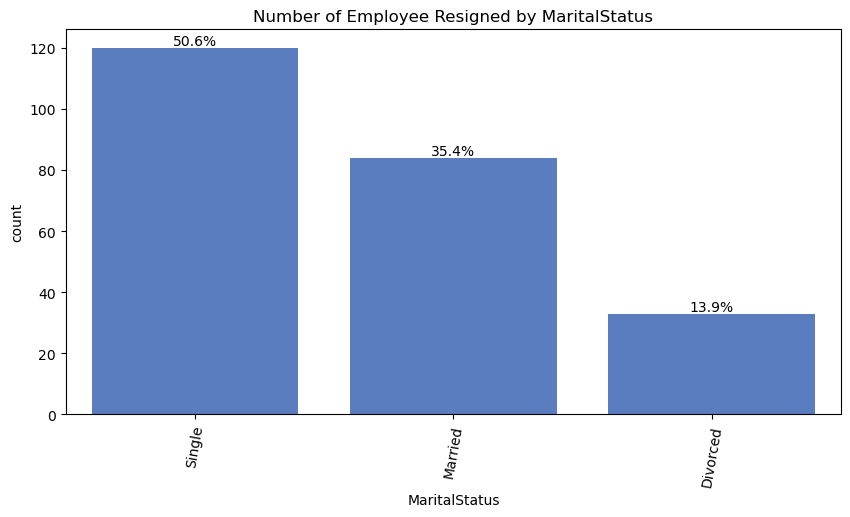

In [81]:
bar_chart_viz(df, 'MaritalStatus')

## **4.3 Why are they leaving?**
We knew the demographic profiles of who was leaving, now we needed to know why?

### ***Salary***
One of the most common assumption was that employee leave for better pay. To test wether of not this was true, we performed statistical testing to see this.
The data showed that:
- Employee with salary less than 5000 are most likely to leave
- There is not much difference of the PercentSalaryHike

From this we know that low salaries are one of the reason that employee leave the company

### ***Work life balance & promotions***
Another common problem, especially associating young people, are work-life balance. Were employee working to much?
Findings:
- Employee who work overtime are more likely to quit

### ***Career Growth & Promotions***
A lack of promotion and professional growth often leads emloyee to look elsewere. Was that happening here?
Findings:
- Employees with less than 2 years in their current role are 50% more likely to resign.
- Employees who haven't been promoted in 3+ years show higher attrition rates.


P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  100620.50000, P-value: 0.00000 
Reject null hypotesis. There is a significant difference of MonthlyIncome of people who stayed and resigned


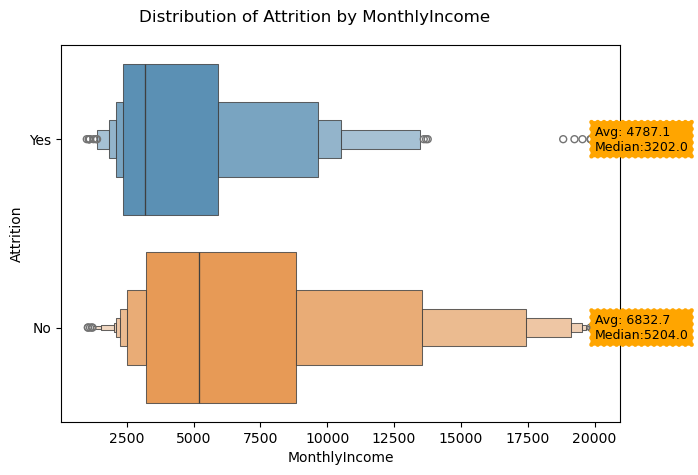

In [82]:
#Monthly Income & Attrition
viz_boxen_plot(df, 'MonthlyIncome', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  140726.50000, P-value: 0.36551 
Failed to reject null hypotesis. There is no significant difference of PercentSalaryHike


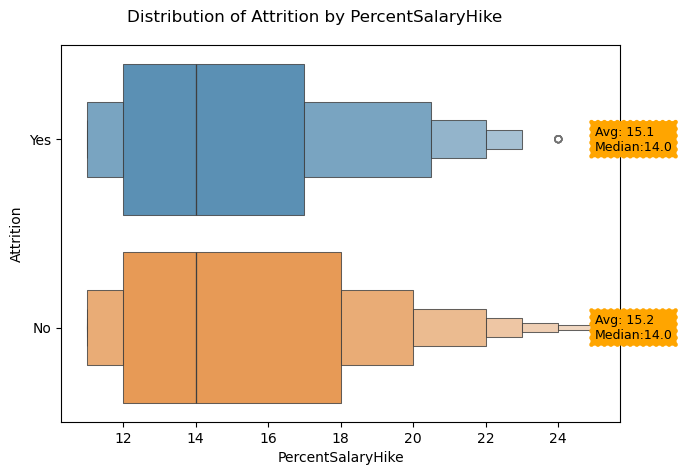

In [83]:
#Monthly Income & Attrition
viz_boxen_plot(df, 'PercentSalaryHike', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  100620.50000, P-value: 0.00000 
Reject null hypotesis. There is a significant difference of MonthlyIncome of people who stayed and resigned


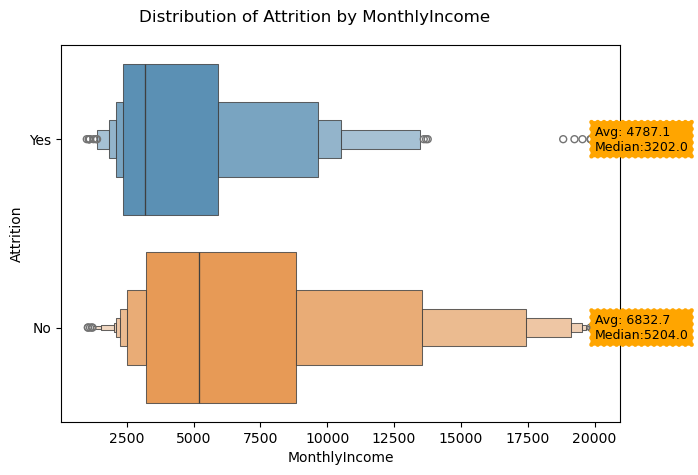

In [84]:
#Monthly Income & Attrition
viz_boxen_plot(df, 'MonthlyIncome', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  123362.50000, P-value: 0.00008 
Reject null hypotesis. There is a significant difference of JobSatisfaction of people who stayed and resigned


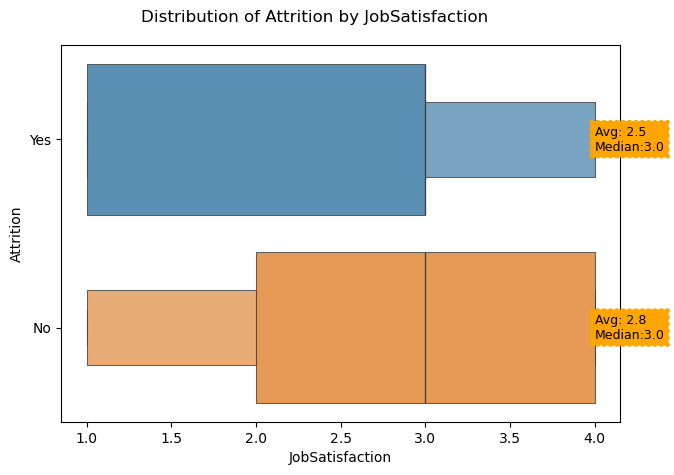

In [85]:
# Job Satisfaction & Attrition
viz_boxen_plot(df, 'JobSatisfaction', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  124787.00000, P-value: 0.00022 
Reject null hypotesis. There is a significant difference of EnvironmentSatisfaction of people who stayed and resigned


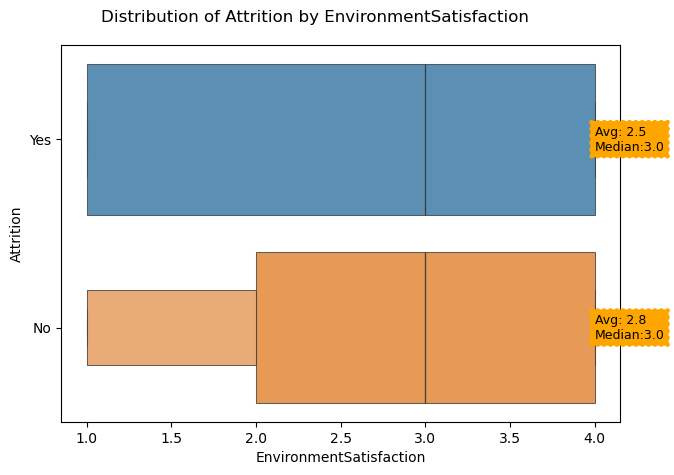

In [86]:
# Job Satisfaction & Attrition
viz_boxen_plot(df, 'EnvironmentSatisfaction', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  146524.50000, P-value: 0.91195 
Failed to reject null hypotesis. There is no significant difference of PerformanceRating


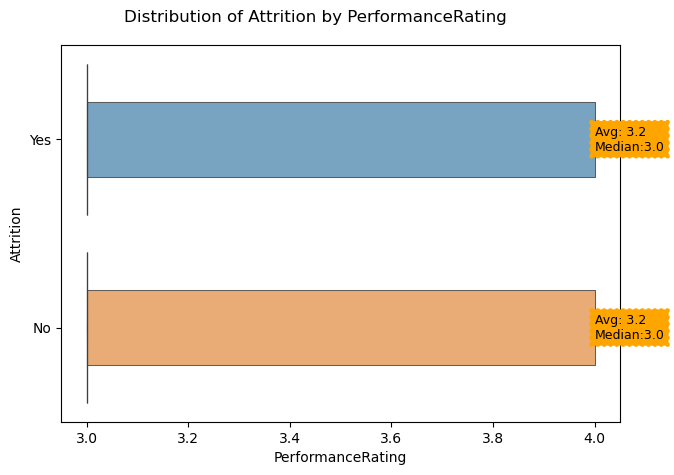

In [87]:
# Job Satisfaction & Attrition
viz_boxen_plot(df, 'PerformanceRating', 'Attrition')

In [88]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Generation'],
      dtype='object')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  106361.50000, P-value: 0.00000 
Reject null hypotesis. There is a significant difference of YearsWithCurrManager of people who stayed and resigned


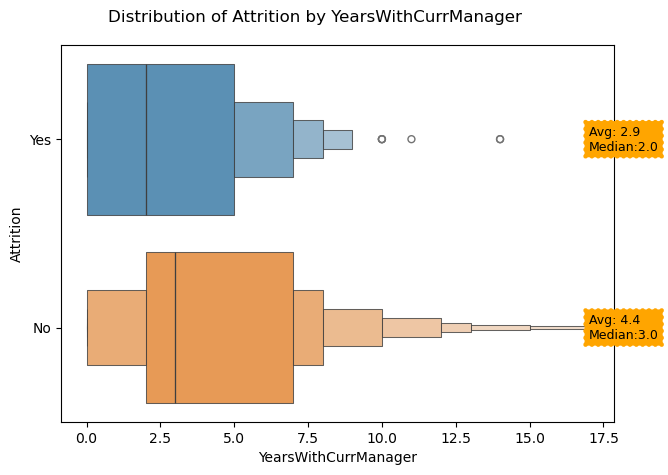

In [89]:
viz_boxen_plot(df, 'YearsWithCurrManager', 'Attrition')

In [90]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Generation'],
      dtype='object')

C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:6: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax = sns.countplot(
C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3502846616.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)


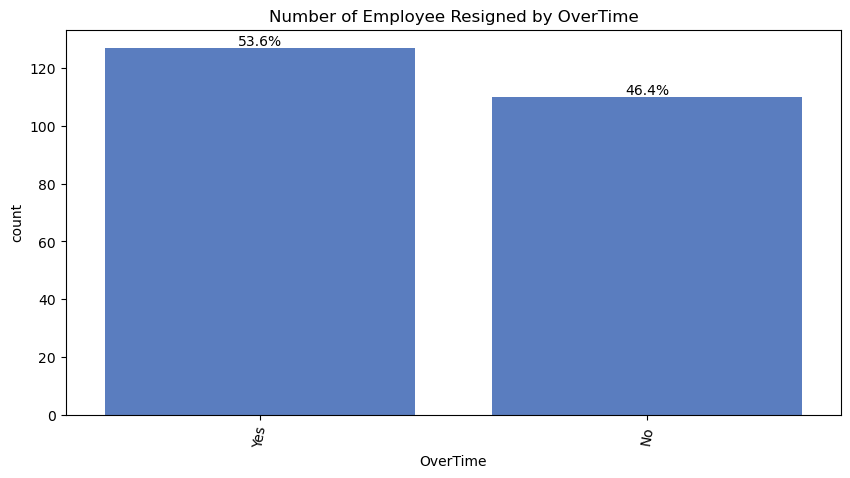

In [91]:
bar_chart_viz(df, 'OverTime')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  135709.50000, P-value: 0.04647 
Reject null hypotesis. There is a significant difference of WorkLifeBalance of people who stayed and resigned


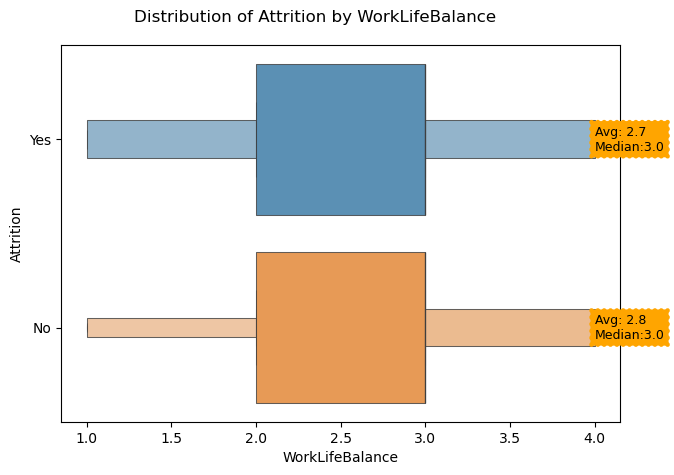

In [92]:
viz_boxen_plot(df, 'WorkLifeBalance', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  134785.50000, P-value: 0.04730 
Reject null hypotesis. There is a significant difference of TrainingTimesLastYear of people who stayed and resigned


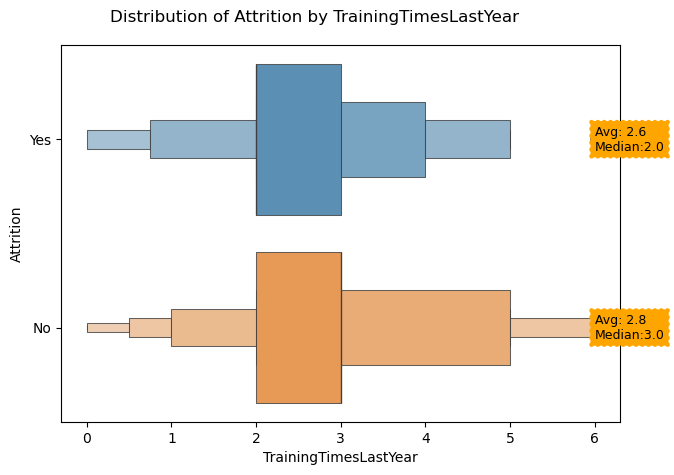

In [93]:
viz_boxen_plot(df, 'TrainingTimesLastYear', 'Attrition')

P-value resigned normality:  0.00000, Stayed:  0.00000
Data not normally distributed, using Mann-Whitney U Test
Statistical test:  134374.00000, P-value: 0.04118 
Reject null hypotesis. There is a significant difference of YearsSinceLastPromotion of people who stayed and resigned


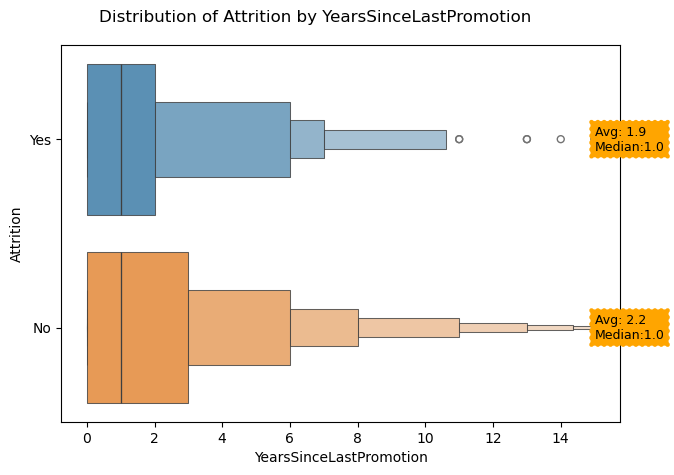

In [94]:
viz_boxen_plot(df, 'YearsSinceLastPromotion', 'Attrition')

## **5. Predicting Attrition: Can We Stop It Before It Happens?**
We now had a clear picture of the causes of attrition, but the next step was crucial:

💡 Can we predict who is at risk of leaving before they actually resign?

🔹 Feature Selection: What Truly Matters?
Using Recursive Feature Elimination (RFECV), we identified the top predictors of attrition:

✔ MonthlyIncome
✔ OverTime
✔ JobSatisfaction
✔ YearsSinceLastPromotion
✔ WorkLifeBalance

Instead of guessing, we now had data-backed indicators of attrition risk.

In [95]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(columns=['Over18', 'Generation'])
ordinal_features = ['Education', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
le = LabelEncoder()

for feature in ordinal_features:
    df[feature] = le.fit_transform(df[feature])
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})  # Target encoding



In [96]:
# Splitting x and y
X = df.drop(columns= ['Attrition'])
y = df['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.2, random_state= 42, stratify=y
)
# Cek ulang apakah masih ada string setelah encoding
print("Kolom non-numerik setelah encoding:", X_train.select_dtypes(include=['object']).columns)


Kolom non-numerik setelah encoding: Index([], dtype='object')


## **5.1 Feature Selection: What Truly Matters?**
Using Recursive Feature Elimination (RFECV), we identified the most important predictors of attrition:
- MonthlyIncome
- OverTime
- JobSatisfaction
- YearsSinceLastPromotion
- WorkLifeBalance

By selecting these features, we can improve model efficiency and accuracy while reducing noise from irrelevant variables.

In [97]:
# Performing RCEF and RCE selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter= 500)

# Using RCEF to select best features
rfecv = RFECV(
    estimator= model
    ,step=1
    ,cv = StratifiedKFold(5)
    ,scoring='accuracy'
    ,n_jobs=1
)

rfecv.fit(X_train, y_train)

# Menampilkan jumlah optimal fitur yang dipilih
print(f"Optimal number of features: {rfecv.n_features_}")

# Menampilkan fitur yang dipilih
selected_features = X_train.columns[rfecv.support_]
print(f"Selected features: {selected_features}")

# Simpan fitur yang sudah terpilih untuk training & testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

c:\Users\PUTU ALVIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PUTU ALVIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Optimal number of features: 39
Selected features: Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       

c:\Users\PUTU ALVIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5.2 Model Selection & Training
We tested multiple machine learning algorithms to find the best model for predicting employee attrition:
✅ Logistic Regression - A simple yet effective linear model for binary classification.
✅ Random Forest - A powerful ensemble method that improves predictive accuracy.
✅ Support Vector Machine (SVM) - A robust classifier for handling complex patterns.
✅ Gradient Boosting - An advanced ensemble technique for minimizing prediction errors.
✅ K-Nearest Neighbors (KNN) - A distance-based algorithm that classifies employees based on similar profiles.

Each model was trained on the selected features and evaluated based on accuracy, precision, recall, F1-score, and ROC-AUC score.

In [98]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [99]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# List model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary untuk menyimpan hasil
results = {}

# Training & Evaluasi Model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Simpan hasil evaluasi
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": classification_report(y_test, y_pred, output_dict=True)['1']["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)['1']["recall"],
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)['1']["f1-score"],
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

print("\nModel training completed!\n")


Training Logistic Regression...
Training Random Forest...
Training Support Vector Machine...
Training Gradient Boosting...
Training K-Nearest Neighbors...

Model training completed!



## **5.3 Model Performance Comparison**
After training and testing, the performance of each model was compared using key evaluation metrics.

Results Summary:
|Model	Accuracy|	Precision |	Recall	|F1-Score|	ROC-AUC|
 | ----- | ----- | -----| ------ | -----|
|Logistic Regression|	86.05%|	60.71%|	36.17%|	45.33%|	81.45%|
|Random Forest	|84.35%	|55.56%	|10.63%	|17.86%	|80.58%|
|Support Vector Machine|	85.71%|	72.73%|	17.02%|	27.58%|	81.75%|
|Gradient Boosting	|84.69%	|54.55%	|25.53%	|34.78%	|81.83%|
|K-Nearest Neighbors|	85.03%|	63.64%|	14.89%|	24.14%|	64.17%|


***Key Insights***:
- Best Model Based on F1-Score: Logistic Regression (45.33%)
- Best Model Based on ROC-AUC Score: Gradient Boosting (81.83%)
- Highest Precision: Support Vector Machine (72.73%)
- Highest Recall: Gradient Boosting (25.53%)

From the results, Logistic Regression appears to be the best overall model due to its strong balance between accuracy (86.05%), F1-score (45.33%), and ROC-AUC (81.45%). While Support Vector Machine (SVM) had the highest precision (72.73%), it struggled with recall (17.02%), meaning it correctly identified fewer actual attrition cases.

The Random Forest model performed poorly in recall (10.63%), meaning it failed to capture many employees who actually left. Similarly, K-Nearest Neighbors had the lowest ROC-AUC score (64.17%), making it less reliable for classification.

                        Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression     0.860544   0.607143  0.361702  0.453333  0.814540
Random Forest           0.843537   0.555556  0.106383  0.178571  0.805840
Support Vector Machine  0.857143   0.727273  0.170213  0.275862  0.817469
Gradient Boosting       0.846939   0.545455  0.255319  0.347826  0.818331
K-Nearest Neighbors     0.850340   0.636364  0.148936  0.241379  0.641700


C:\Users\PUTU ALVIN\AppData\Local\Temp\ipykernel_26068\3376950820.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="coolwarm")


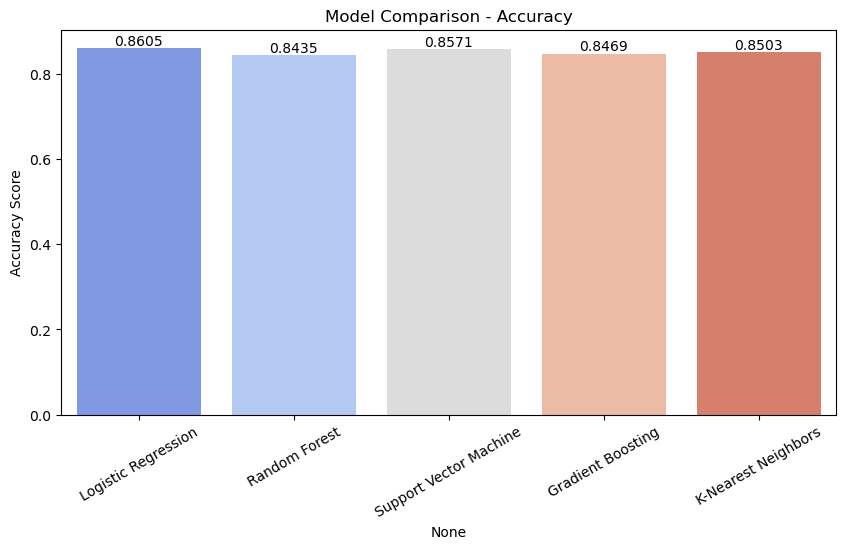

In [100]:
results_df = pd.DataFrame(results).T

# Print summary hasil
print(results_df)

# Visualisasi hasil
plt.figure(figsize=(10,5))
ax = sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="coolwarm")
plt.title("Model Comparison - Accuracy")
plt.xticks(rotation=30)
plt.ylabel("Accuracy Score")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.4f}'.format(p.get_height())
            ,fontsize = 10, color = 'black', ha = 'center', va = 'bottom')
plt.show()

## **5.4 Final Model Evaluation**
Since Logistic Regression achieved the best balance of precision, recall, and F1-score, we selected it as the final model.

📊 Confusion Matrix for Logistic Regression:
The confusion matrix below shows the number of correct and incorrect predictions for employee attrition:

***Strengths of Logistic Regression***:
- High accuracy and F1-score make it a reliable predictor.
- Good trade-off between precision and recall.
- Easy to interpret, allowing HR teams to understand key drivers of attrition.

***Limitations***:
- Still struggles with recall (only 36.17%), meaning it doesn't catch all cases of attrition.
- May not capture complex non-linear relationships as well as ensemble models.

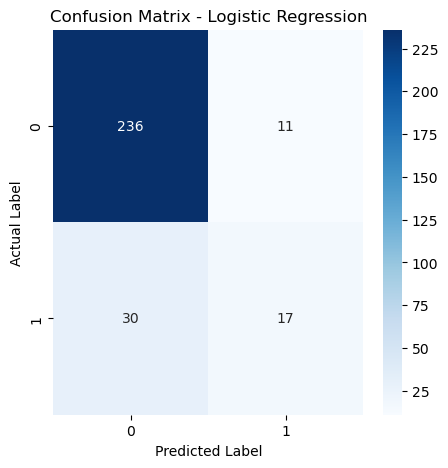

In [101]:
# Pilih model terbaik berdasarkan F1-Score
best_model_name = results_df["F1-Score"].idxmax()
best_model = models[best_model_name]

# Prediksi
y_pred_best = best_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## **5.5 Business Impact & Actionable Strategies**
Now that we have a predictive model, here are actionable HR strategies based on the insights:

- Salary Adjustments: Employees with low salaries are at higher risk of leaving. HR should consider competitive pay adjustments.
- Overtime Reduction: Employees working excessive overtime should have improved work-life balance initiatives.
- Career Growth Opportunities: Employees without promotions for 3+ years should be prioritized for career development programs.
- Regular Job Satisfaction Assessments: Since Job Satisfaction is a key predictor, employee surveys and engagement initiatives should be implemented.

